# Regression

In [10]:
# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
library(MASS)
library(ISLR)
library(ggiraphExtra)
theme_set(theme_bw())  # pre-set the bw theme.

In [2]:
names(Boston)
?Boston

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

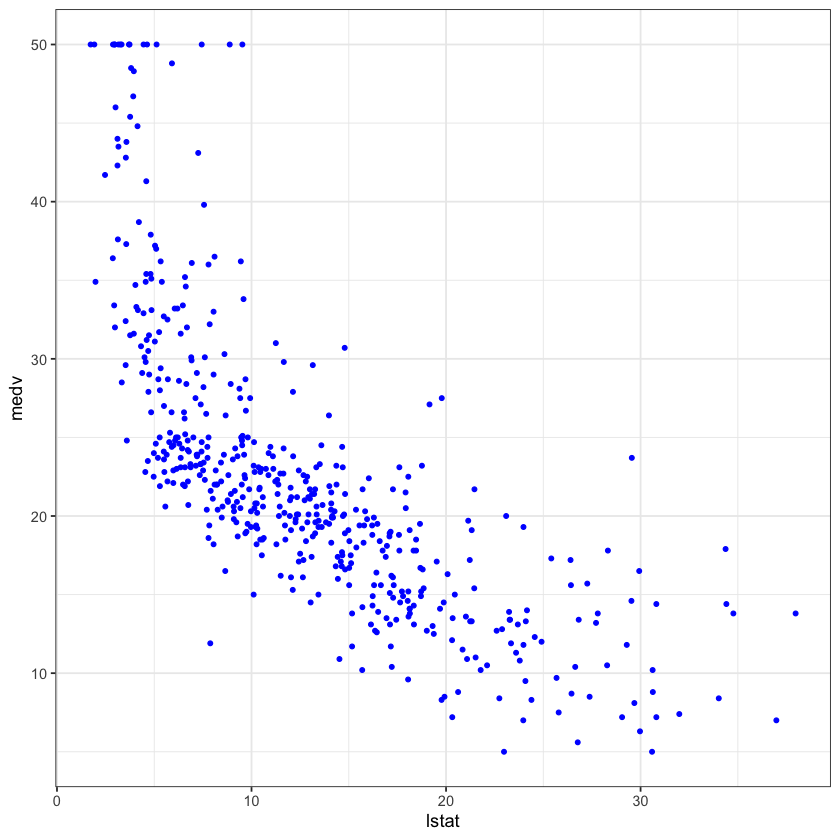

In [3]:
ggplot(Boston, aes(x=lstat, y=medv)) + geom_point(size=1, color="blue")

In [4]:
fit1 = lm(medv~lstat, data=Boston)
summary(fit1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41 <0.0000000000000002 ***
lstat       -0.95005    0.03873  -24.53 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 0.00000000000000022


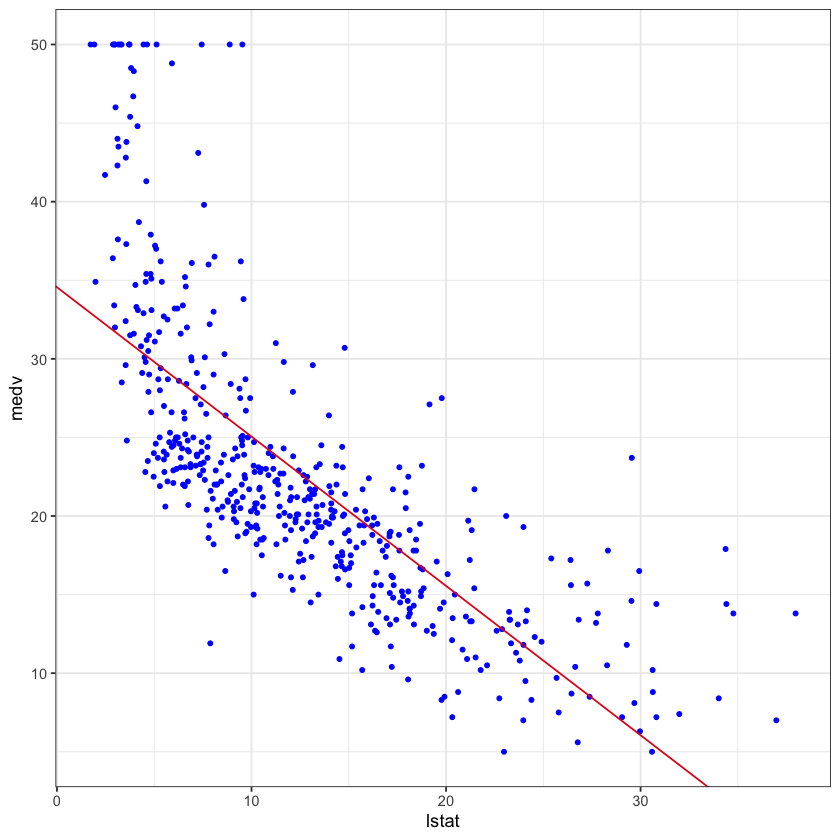

In [5]:
ggplot(Boston, aes(x=lstat, y=medv)) + geom_point(size=1, color="blue") +
geom_abline(slope = fit1$coefficients[2], intercept = fit1$coefficients[1], colour='#E41A1C')

In [6]:
names(fit1)
confint(fit1)
predict(fit1, data.frame(lstat=c(5, 10, 15)), interval = "confidence")

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


## Multiple linear regression

In [7]:
fit2 = lm(medv~lstat+age, data=Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458 < 0.0000000000000002 ***
lstat       -1.03207    0.04819 -21.416 < 0.0000000000000002 ***
age          0.03454    0.01223   2.826              0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 0.00000000000000022


In [8]:
fit3 = lm(medv~., data=Boston)
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)  36.4594884   5.1034588   7.144    0.000000000003283 ***
crim         -0.1080114   0.0328650  -3.287             0.001087 ** 
zn            0.0464205   0.0137275   3.382             0.000778 ***
indus         0.0205586   0.0614957   0.334             0.738288    
chas          2.6867338   0.8615798   3.118             0.001925 ** 
nox         -17.7666112   3.8197437  -4.651    0.000004245643808 ***
rm            3.8098652   0.4179253   9.116 < 0.0000000000000002 ***
age           0.0006922   0.0132098   0.052             0.958229    
dis          -1.4755668   0.1994547  -7.398    0.000000000000601 ***
rad           0.3060495   0.0663464   4.613    0.000005070529023 ***
tax          -0.0123346   0.0037605  -3.280             0.001112 ** 
ptratio      -0.95

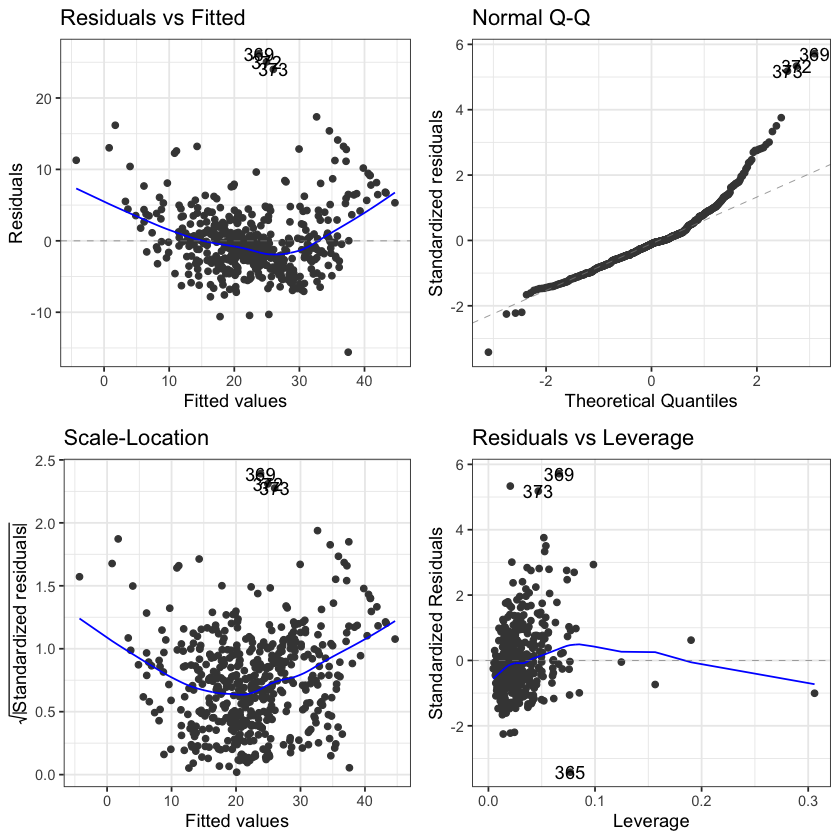

In [19]:
library(ggfortify)
autoplot(fit3)

In [20]:
fit4=update(fit3,~.-age-indus)
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171  0.00000000000272727 ***
crim         -0.108413   0.032779  -3.307             0.001010 ** 
zn            0.045845   0.013523   3.390             0.000754 ***
chas          2.718716   0.854240   3.183             0.001551 ** 
nox         -17.376023   3.535243  -4.915  0.00000120941304009 ***
rm            3.801579   0.406316   9.356 < 0.0000000000000002 ***
dis          -1.492711   0.185731  -8.037  0.00000000000000684 ***
rad           0.299608   0.063402   4.726  0.00000299679930933 ***
tax          -0.011778   0.003372  -3.493             0.000521 ***
ptratio      -0.946525   0.129066  -7.334  0.00000000000092351 ***
black         0.009291  

## Nonlinear terms

In [21]:
fit5 = lm(medv~lstat*age, data=Boston)
summary(fit5)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553 < 0.0000000000000002 ***
lstat       -1.3921168  0.1674555  -8.313 0.000000000000000878 ***
age         -0.0007209  0.0198792  -0.036               0.9711    
lstat:age    0.0041560  0.0018518   2.244               0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 0.00000000000000022


In [22]:
fit6 = lm(medv~lstat+I(lstat^2), data=Boston)
summary(fit6)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15 <0.0000000000000002 ***
lstat       -2.332821   0.123803  -18.84 <0.0000000000000002 ***
I(lstat^2)   0.043547   0.003745   11.63 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 0.00000000000000022


The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



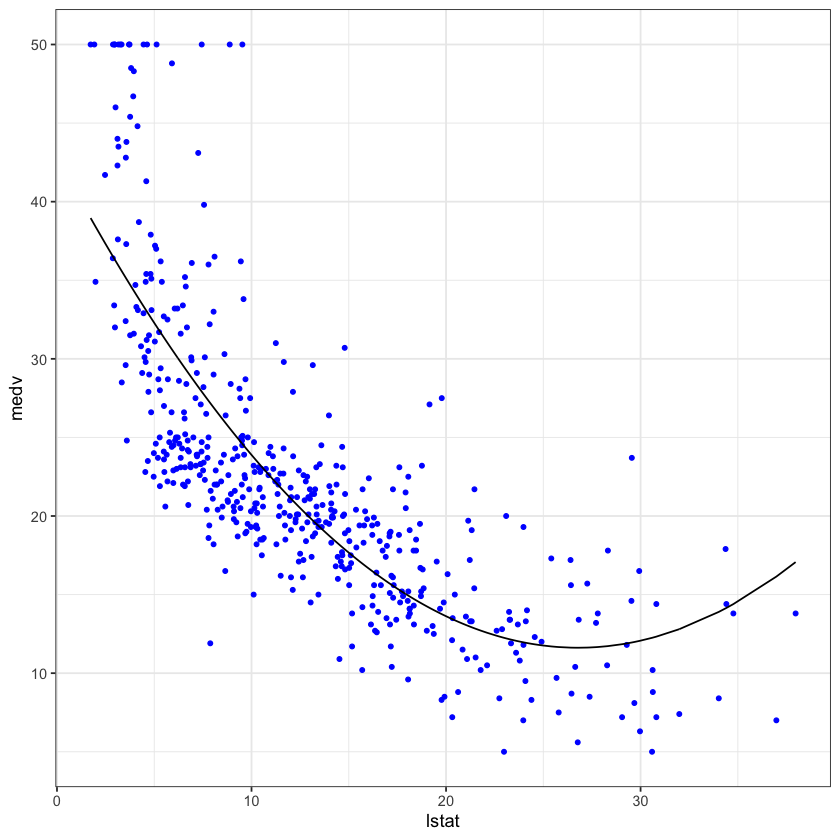

In [26]:
attach(Boston)
pred = predict(fit6, data=Boston)
ggplot(Boston, aes(x=lstat, y=medv)) + geom_point(size=1, color="blue") +
geom_line(aes(y=pred))

In [27]:
fit7 = lm(medv~poly(lstat, 4), data=Boston)
summary(fit7)


Call:
lm(formula = medv ~ poly(lstat, 4), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.563  -3.180  -0.632   2.283  27.181 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       22.5328     0.2347  95.995 < 0.0000000000000002 ***
poly(lstat, 4)1 -152.4595     5.2801 -28.874 < 0.0000000000000002 ***
poly(lstat, 4)2   64.2272     5.2801  12.164 < 0.0000000000000002 ***
poly(lstat, 4)3  -27.0511     5.2801  -5.123          0.000000429 ***
poly(lstat, 4)4   25.4517     5.2801   4.820          0.000001904 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.28 on 501 degrees of freedom
Multiple R-squared:  0.673,	Adjusted R-squared:  0.6704 
F-statistic: 257.8 on 4 and 501 DF,  p-value: < 0.00000000000000022


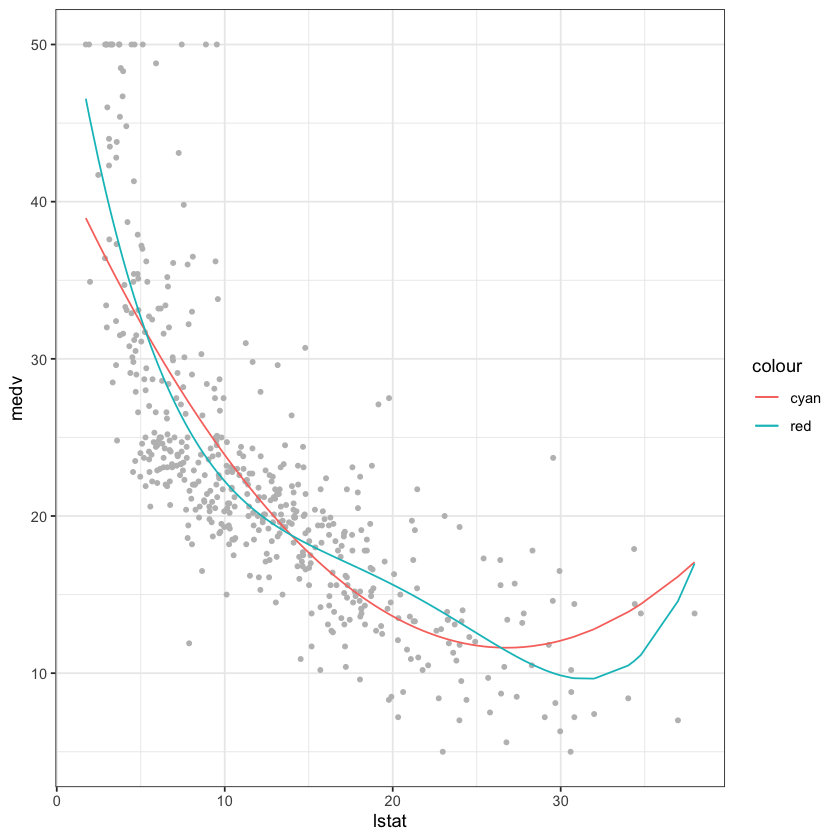

In [31]:
pred6 = predict(fit6, data=Boston)
pred7 = predict(fit7, data=Boston)
ggplot(Boston, aes(x=lstat, y=medv)) + geom_point(size=1, color="gray") +
geom_line(aes(y=pred6, color='cyan'))+
geom_line(aes(y=pred7, color='red'))

In [18]:
install.packages("ggfortify")

also installing the dependency ‘gridExtra’




The downloaded binary packages are in
	/var/folders/1x/hdfy228j1m56sj_h_wlzdd6c0000gn/T//RtmpRTUujc/downloaded_packages


## Qualitative predictors

In [32]:
fix(Carseats)

In [33]:
names(Carseats)
summary(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [34]:
fit1 = lm(Sales~.+Income:Advertising+Age:Price, data=Carseats)
summary(fit1)


Call:
lm(formula = Sales ~ . + Income:Advertising + Age:Price, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value             Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519       0.000000000222 ***
CompPrice           0.0929371  0.0041183  22.567 < 0.0000000000000002 ***
Income              0.0108940  0.0026044   4.183       0.000035665275 ***
Advertising         0.0702462  0.0226091   3.107             0.002030 ** 
Population          0.0001592  0.0003679   0.433             0.665330    
Price              -0.1008064  0.0074399 -13.549 < 0.0000000000000002 ***
ShelveLocGood       4.8486762  0.1528378  31.724 < 0.0000000000000002 ***
ShelveLocMedium     1.9532620  0.1257682  15.531 < 0.0000000000000002 ***
Age                -0.0579466  0.0159506  -3.633             0.000318 ***
Education          -0.0208525  0.0196131  -1.063             0.288361 

In [35]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


## R Function

In [47]:
regplot = function(x, y){
  fit = lm(y~x)

  #plot(x, y)
  #abline(fit, col='red')
  df <- data.frame("x_" = x, "y_" = y)
  ggplot(data=df, aes(x=x_, y=y_)) + geom_point(size=1, color="gray") +
  geom_abline(slope = fit$coefficients[2], intercept = fit$coefficients[1], colour='red')
}

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 7):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



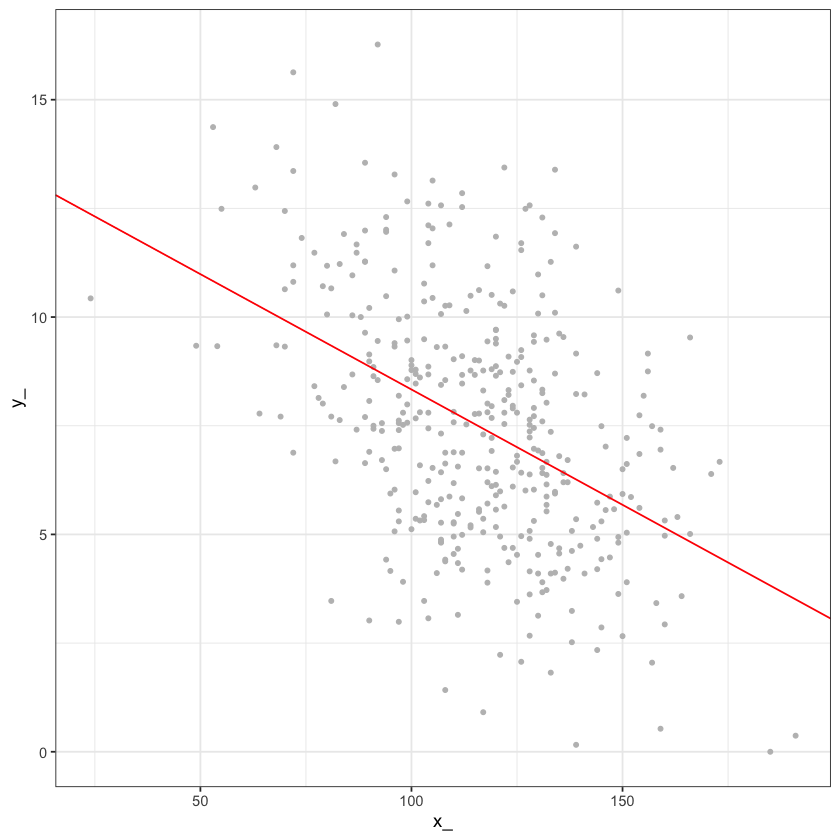

In [48]:
attach(Carseats)
regplot(Price, Sales)